# Predicting Continuous Target Variables with Regression Analysis

In [1]:
import pandas as pd
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/housing/housing.data', header=None, sep='\s+')
df.columns = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


# Visualizing the important characteristics of a dataset

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='whitegrid', context='notebook')
cols = ['LSTAT', 'INDUS', 'NOX', 'RM', 'MEDV']
sns.pairplot(df[cols], size=2.5)
plt.show()

In [3]:
df[cols].values.T

array([[ 4.98 ,  9.14 ,  4.03 , ...,  5.64 ,  6.48 ,  7.88 ],
       [ 2.31 ,  7.07 ,  7.07 , ..., 11.93 , 11.93 , 11.93 ],
       [ 0.538,  0.469,  0.469, ...,  0.573,  0.573,  0.573],
       [ 6.575,  6.421,  7.185, ...,  6.976,  6.794,  6.03 ],
       [24.   , 21.6  , 34.7  , ..., 23.9  , 22.   , 11.9  ]])

In [4]:
import numpy as np
cm = np.corrcoef(df[cols].values.T)
cm

array([[ 1.        ,  0.60379972,  0.59087892, -0.61380827, -0.73766273],
       [ 0.60379972,  1.        ,  0.76365145, -0.39167585, -0.48372516],
       [ 0.59087892,  0.76365145,  1.        , -0.30218819, -0.42732077],
       [-0.61380827, -0.39167585, -0.30218819,  1.        ,  0.69535995],
       [-0.73766273, -0.48372516, -0.42732077,  0.69535995,  1.        ]])

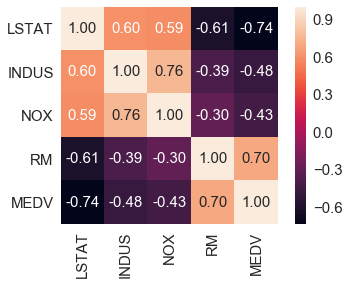

In [5]:
sns.set(font_scale=1.5)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size':15}, yticklabels=cols, xticklabels=cols)
plt.show()

# Ordinary least squares linear regression model

In [6]:
class LinearRegressionGD(object):
    def __init__(self, eta=0.001, n_iter=20):
        self.eta = eta
        self.n_iter = n_iter
    
    def fit(self, X, y):
        n_features = X.shape[1]
        self.w_ = np.zeros(n_features+1)
        self.cost_ = []
        for _ in range(self.n_iter):
            output = self.net_input(X)
            self.w_[1:] += self.eta * (y-output).dot(X)
            self.w_[0] += self.eta * np.sum(y-output)
            self.cost_.append(np.sum((y-output)**2)/2)
    
    def net_input(self, X):
        return self.w_[1:].dot(X.T) + self.w_[0]
        
    def predict(self, X):
        return self.net_input(X)

In [7]:
X = df[['RM']].values

In [8]:
y = df[['MEDV']].values

In [9]:
from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler()
sc_y = StandardScaler()
X_std = sc_x.fit_transform(X)
y_std = sc_y.fit_transform(y)

In [10]:
y_std

array([[ 0.15968566],
       [-0.10152429],
       [ 1.32424667],
       [ 1.18275795],
       [ 1.48750288],
       [ 0.6712218 ],
       [ 0.03996443],
       [ 0.49708184],
       [-0.65659542],
       [-0.39538548],
       [-0.81985164],
       [-0.39538548],
       [-0.09064054],
       [-0.23212926],
       [-0.47157171],
       [-0.286548  ],
       [ 0.06173193],
       [-0.54775795],
       [-0.25389676],
       [-0.47157171],
       [-0.97222411],
       [-0.31919924],
       [-0.79808414],
       [-0.87427038],
       [-0.75454915],
       [-0.93957286],
       [-0.64571167],
       [-0.84161913],
       [-0.44980422],
       [-0.16682677],
       [-1.07017784],
       [-0.87427038],
       [-1.0157591 ],
       [-1.02664285],
       [-0.98310786],
       [-0.39538548],
       [-0.27566425],
       [-0.16682677],
       [ 0.23587189],
       [ 0.89978051],
       [ 1.34601416],
       [ 0.4426631 ],
       [ 0.30117438],
       [ 0.23587189],
       [-0.14505928],
       [-0

In [11]:
y_std.shape

(506, 1)

In [12]:
y_std = y_std.reshape((y_std.shape[0]))

In [13]:
lr = LinearRegressionGD()

In [14]:
lr.fit(X_std, y_std)

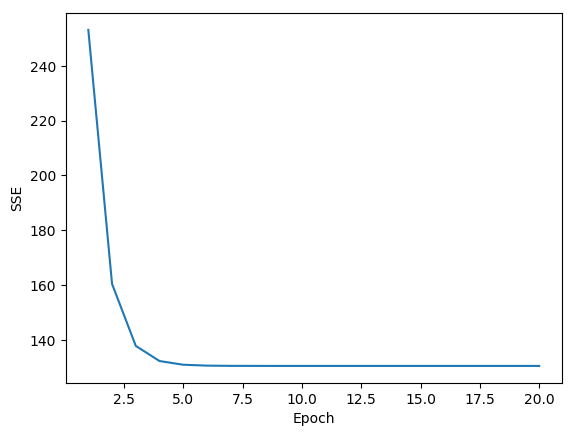

In [15]:
sns.reset_orig()
plt.plot(range(1, lr.n_iter+1), lr.cost_)
plt.ylabel('SSE')
plt.xlabel('Epoch')
plt.show()

In [16]:
def lin_regplot(X, y, model):
    plt.scatter(X, y, c='blue')
    plt.plot(X, model.predict(X), c='red')
    return None

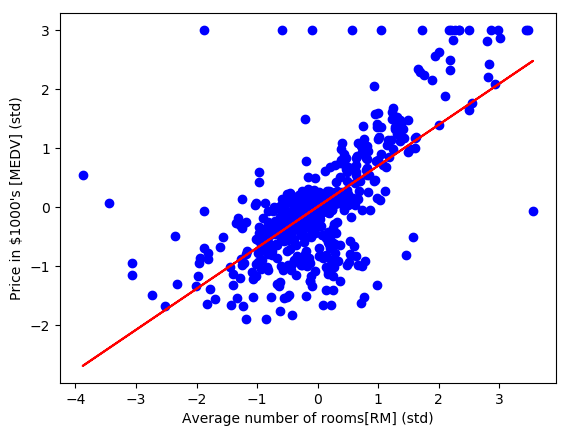

In [17]:
lin_regplot(X_std, y_std, lr)
plt.xlabel('Average number of rooms[RM] (std)')
plt.ylabel('Price in $1000\'s [MEDV] (std)')
plt.show()

In [18]:
num_rooms_std = sc_x.transform([[5.0]])

In [19]:
num_rooms_std

array([[-1.83016553]])

In [20]:
price_std = lr.predict(num_rooms_std)

In [21]:
price_std

array([-1.27262285])

In [22]:
print("Price in $1000\'s: %.3f" % sc_y.inverse_transform(price_std))

Price in $1000's: 10.840


In [23]:
print("slope: %.3f" % lr.w_[1])

slope: 0.695


In [24]:
print("intercept: %.3f" % lr.w_[0])

intercept: -0.000


# Estimating the coefficient of a regression model via scikit-learn

In [25]:
from sklearn.linear_model import LinearRegression
slr = LinearRegression()
slr.fit(X, y)
print('slope: %.3f' % slr.coef_[0][0])
print('intercept: %.3f' % slr.intercept_)

slope: 9.102
intercept: -34.671


In [26]:
X

array([[6.575],
       [6.421],
       [7.185],
       [6.998],
       [7.147],
       [6.43 ],
       [6.012],
       [6.172],
       [5.631],
       [6.004],
       [6.377],
       [6.009],
       [5.889],
       [5.949],
       [6.096],
       [5.834],
       [5.935],
       [5.99 ],
       [5.456],
       [5.727],
       [5.57 ],
       [5.965],
       [6.142],
       [5.813],
       [5.924],
       [5.599],
       [5.813],
       [6.047],
       [6.495],
       [6.674],
       [5.713],
       [6.072],
       [5.95 ],
       [5.701],
       [6.096],
       [5.933],
       [5.841],
       [5.85 ],
       [5.966],
       [6.595],
       [7.024],
       [6.77 ],
       [6.169],
       [6.211],
       [6.069],
       [5.682],
       [5.786],
       [6.03 ],
       [5.399],
       [5.602],
       [5.963],
       [6.115],
       [6.511],
       [5.998],
       [5.888],
       [7.249],
       [6.383],
       [6.816],
       [6.145],
       [5.927],
       [5.741],
       [5.966],
       [

In [27]:
y

array([[24. ],
       [21.6],
       [34.7],
       [33.4],
       [36.2],
       [28.7],
       [22.9],
       [27.1],
       [16.5],
       [18.9],
       [15. ],
       [18.9],
       [21.7],
       [20.4],
       [18.2],
       [19.9],
       [23.1],
       [17.5],
       [20.2],
       [18.2],
       [13.6],
       [19.6],
       [15.2],
       [14.5],
       [15.6],
       [13.9],
       [16.6],
       [14.8],
       [18.4],
       [21. ],
       [12.7],
       [14.5],
       [13.2],
       [13.1],
       [13.5],
       [18.9],
       [20. ],
       [21. ],
       [24.7],
       [30.8],
       [34.9],
       [26.6],
       [25.3],
       [24.7],
       [21.2],
       [19.3],
       [20. ],
       [16.6],
       [14.4],
       [19.4],
       [19.7],
       [20.5],
       [25. ],
       [23.4],
       [18.9],
       [35.4],
       [24.7],
       [31.6],
       [23.3],
       [19.6],
       [18.7],
       [16. ],
       [22.2],
       [25. ],
       [33. ],
       [23.5],
       [19

In [28]:
def lin_regplot_intcpt(X, y, model):
    plt.scatter(X, y, c='blue')
    # If axis is not given, both arr and values are flattened before use.
    plt.plot(np.append(X, [[0]], axis=0), model.predict(np.append(X, [[0]], axis=0)), c='red')
    return None

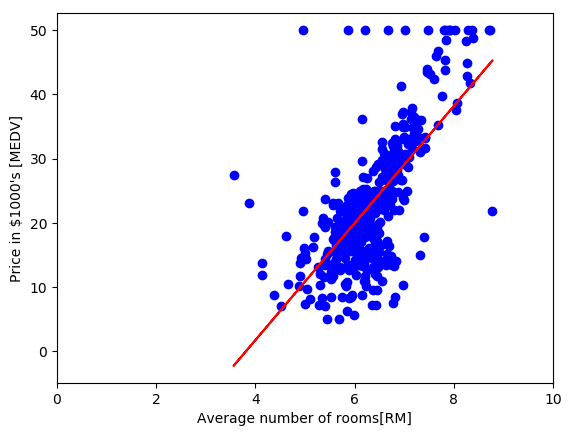

In [29]:
lin_regplot(X, y, slr)
plt.xlabel('Average number of rooms[RM]')
plt.ylabel('Price in $1000\'s [MEDV]')
plt.xlim([0, 10])
plt.show()

# Fitting a robust regression model using RANSAC

In [37]:
from sklearn.linear_model import RANSACRegressor
ransac = RANSACRegressor(LinearRegression(),
                         max_trials=100,
                         min_samples=50,
                         residual_metric=lambda dy:np.sum(np.abs(dy), axis=1),
                         residual_threshold=5.0,
                         random_state=0
                        )
ransac.fit(X, y)

/Users/huilong/anaconda2/lib/python2.7/site-packages/sklearn/linear_model/ransac.py:288: DeprecationWarning: 'residual_metric' was deprecated in version 0.18 and will be removed in version 0.20. Use 'loss' instead.
  DeprecationWarning)


RANSACRegressor(base_estimator=LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False),
        is_data_valid=None, is_model_valid=None, loss='absolute_loss',
        max_skips=inf, max_trials=100, min_samples=50, random_state=0,
        residual_metric=<function <lambda> at 0x1a16172c08>,
        residual_threshold=5.0, stop_n_inliers=inf, stop_probability=0.99,
        stop_score=inf)

In [39]:
inlier_mask = ransac.inlier_mask_
outlier_mask = np.logical_not(inlier_mask)
line_X = np.arange(3, 10, 1)
line_y_ransac = ransac.predict(line_X[:, np.newaxis])

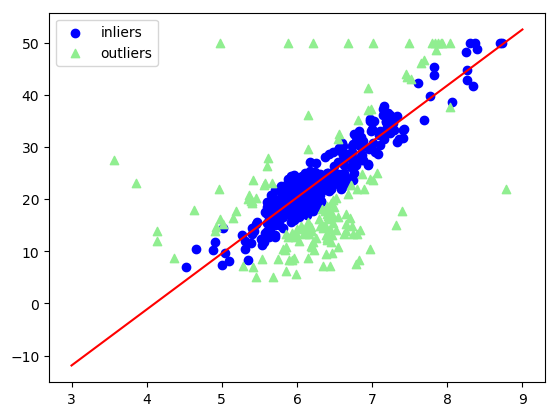

In [42]:
plt.scatter(X[inlier_mask], y[inlier_mask], color='blue', marker='o', label='inliers')
plt.scatter(X[outlier_mask], y[outlier_mask], color='lightgreen', marker='^', label='outliers')
plt.plot(line_X, line_y_ransac, color='red')
plt.legend()
plt.show()

In [45]:
print(ransac.estimator_.coef_)
print(ransac.estimator_.intercept_)

[[10.73450881]]
[-44.08906429]


# Evaluating the performance of linear regression models

In [48]:
from sklearn.cross_validation import train_test_split
X = df.iloc[:, :-1].values
y = df['MEDV'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
slr = LinearRegression()
slr.fit(X_train, y_train)
y_train_pred = slr.predict(X_train)
y_test_pred = slr.predict(X_test)

In [50]:
X.shape

(506, 13)

In [51]:
y.shape

(506,)

**Residual plot**

[]

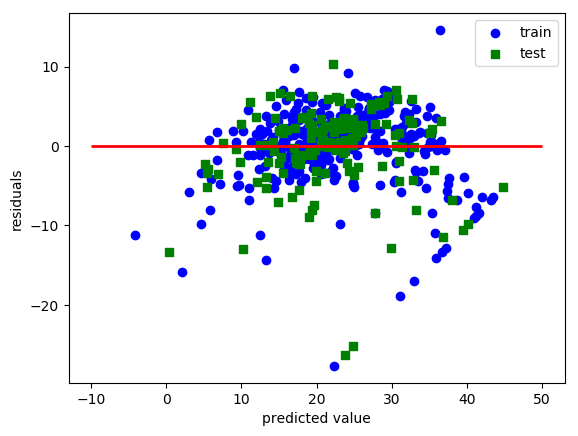

In [62]:
plt.scatter(y_train_pred, y_train_pred-y_train, color='blue', marker='o', label='train')
plt.scatter(y_test_pred, y_test_pred-y_test, color='green', marker='s', label='test')
plt.hlines(y=0, xmin=-10, xmax=50, lw=2, color='red')
plt.xlabel('predicted value')
plt.ylabel('residuals')
plt.legend()
plt.plot()

**Mean Squared Error and R^2**

In [63]:
from sklearn.metrics import mean_squared_error
print('MSE train: %.3f, test: %.3f' % (
        mean_squared_error(y_train, y_train_pred),
        mean_squared_error(y_test, y_test_pred)
    ))

MSE train: 19.958, test: 27.196


In [64]:
from sklearn.metrics import r2_score
print('R^2 train: %.3f, test: %.3f' %(
         r2_score(y_train, y_train_pred),
         r2_score(y_test, y_test_pred)
     ))

R^2 train: 0.765, test: 0.673
